In [1]:
%matplotlib inline
from preamble import *

import os
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
# The file has no headers naming the columns, so we pass header=None
# and provide the column names explicitly in "names"
dust_data_path = os.path.join(mglearn.datasets.DATA_PATH, "Cheonan_dust_pm10.csv")

rootData = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

data2 = pd.read_csv(
    dust_data_path, 
    
    index_col=False,
    #names=['time', 'pm10', 'pm2.5']
)

rootData = rootData[['date', 'bs', 'sh', 'ss']]
rootData = rootData.dropna()

print(rootData)

# For illustration purposes, we only select some of the columns:
data = data[['date', 'bs']]
data2 = pd.DataFrame(data2[['date', 'bs']])

# IPython.display allows nice output formatting within the Jupyter notebook

display(data.head())

#plt.plot(data)

#print(data.size) 
#print(data)
#print(data2)
data = data.dropna()
print(data)
data2 = data2.dropna()
print(data2.dropna())

a = rootData['date']

a = np.array(rootData['date'],)

for i in range(a.size):
    a[i] = i+1.0
    
print(a)


b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

X, y = rootData['date'], rootData['bs']

print("X.shape: {}".format(X.shape))
print("y.shape: {}".format(y.shape))
print(X.size)

              date     bs     sh     ss
0    2018-04-01:01   66.0   71.0   73.0
1    2018-04-01:02   76.0   71.0   71.0
2    2018-04-01:03   72.0   69.0   70.0
3    2018-04-01:04   69.0   70.0   68.0
4    2018-04-01:05   65.0   67.0   73.0
5    2018-04-01:06   63.0   66.0   61.0
6    2018-04-01:07   71.0   69.0   70.0
7    2018-04-01:08   67.0   72.0   85.0
8    2018-04-01:09   82.0   77.0  117.0
9    2018-04-01:10   71.0   80.0  100.0
10   2018-04-01:11   64.0   78.0   86.0
11   2018-04-01:12   66.0   77.0   78.0
12   2018-04-01:13   68.0   79.0   84.0
13   2018-04-01:14   77.0   83.0   79.0
14   2018-04-01:15  102.0   93.0   94.0
15   2018-04-01:16  118.0  103.0   98.0
16   2018-04-01:17  115.0  104.0  114.0
17   2018-04-01:18   90.0   99.0  106.0
18   2018-04-01:19   92.0   92.0   82.0
19   2018-04-01:20   94.0   87.0   89.0
20   2018-04-01:21   86.0   84.0   90.0
21   2018-04-01:22   85.0   83.0   92.0
22   2018-04-01:23   82.0   82.0   84.0
23   2018-04-01:24   73.0   79.0   93.0


,date,bs
0,2018-04-01:01,66.0
1,2018-04-01:02,76.0
2,2018-04-01:03,72.0
3,2018-04-01:04,69.0
4,2018-04-01:05,65.0


              date     bs
0    2018-04-01:01   66.0
1    2018-04-01:02   76.0
2    2018-04-01:03   72.0
3    2018-04-01:04   69.0
4    2018-04-01:05   65.0
5    2018-04-01:06   63.0
6    2018-04-01:07   71.0
7    2018-04-01:08   67.0
8    2018-04-01:09   82.0
9    2018-04-01:10   71.0
10   2018-04-01:11   64.0
11   2018-04-01:12   66.0
12   2018-04-01:13   68.0
13   2018-04-01:14   77.0
14   2018-04-01:15  102.0
15   2018-04-01:16  118.0
16   2018-04-01:17  115.0
17   2018-04-01:18   90.0
18   2018-04-01:19   92.0
19   2018-04-01:20   94.0
20   2018-04-01:21   86.0
21   2018-04-01:22   85.0
22   2018-04-01:23   82.0
23   2018-04-01:24   73.0
24   2018-04-02:01   98.0
25   2018-04-02:02   86.0
27   2018-04-02:04   76.0
28   2018-04-02:05   65.0
29   2018-04-02:06   62.0
30   2018-04-02:07   58.0
..             ...    ...
689  2018-04-29:18   68.0
690  2018-04-29:19   51.0
691  2018-04-29:20   54.0
692  2018-04-29:21   50.0
693  2018-04-29:22   66.0
694  2018-04-29:23   82.0
695  2018-04

699
(1000, 1)


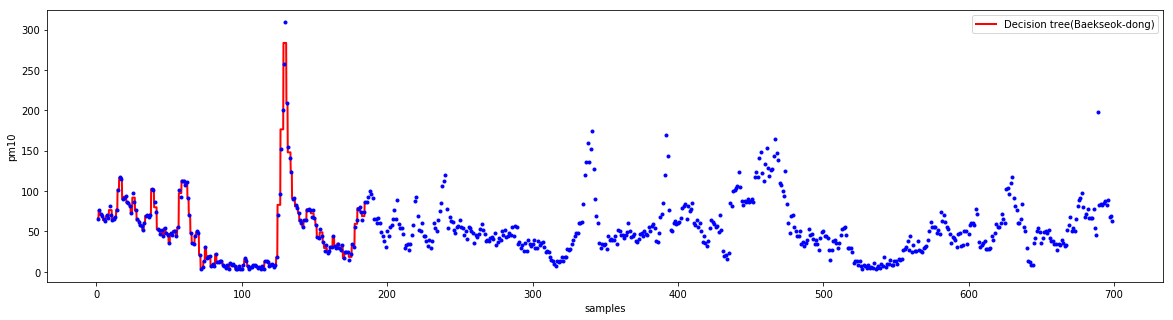

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#print(a)
print(a.size)
aT = np.reshape(a, (a.size, 1))
#print(aT)

b = np.array(rootData['bs'],)
c = np.array(rootData['sh'],) #성황동
d = np.array(rootData['ss'],) #성성동

#print(b)

plt.figure(figsize=(20, 5))

line = np.linspace(1, 186, 1000, endpoint=False).reshape(-1, 1)
print(line.shape)

reg = DecisionTreeRegressor(min_samples_split=3).fit(aT, b)
plt.plot(line, reg.predict(line), label="Decision tree(Baekseok-dong)", c='r')

#reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
#plt.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='b')

#reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
#plt.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='g')

#reg = LinearRegression().fit(aT, b)
#plt.plot(line, reg.predict(line), label="linear regression")




plt.plot(aT, b, '.', c='b')
#plt.plot(aT, c, '.', c='k')
#plt.plot(aT, d, '.', c='k')
#plt.xticks(rotation=90)
plt.ylabel("pm10")
plt.xlabel("samples")
plt.legend(loc="best")

(699, 1)


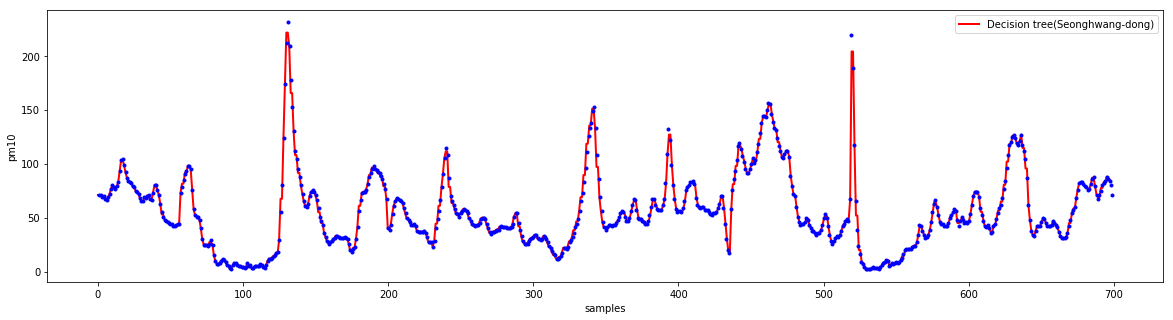

In [3]:

#print(b)

plt.figure(figsize=(20, 5))

line = np.linspace(0, 698, 699, endpoint=False).reshape(-1, 1)
print(line.shape)

reg2 = DecisionTreeRegressor(min_samples_split=3).fit(aT, c)
plt.plot(line, reg2.predict(line), label="Decision tree(Seonghwang-dong)", c='r')

#reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
#plt.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='g')

#reg = LinearRegression().fit(aT, b)
#plt.plot(line, reg.predict(line), label="linear regression")




plt.plot(aT, c, '.', c='b')
#plt.plot(aT, c, '.', c='k')
#plt.plot(aT, d, '.', c='k')
#plt.xticks(rotation=90)
plt.ylabel("pm10")
plt.xlabel("samples")
plt.legend(loc="best")

(699, 1)


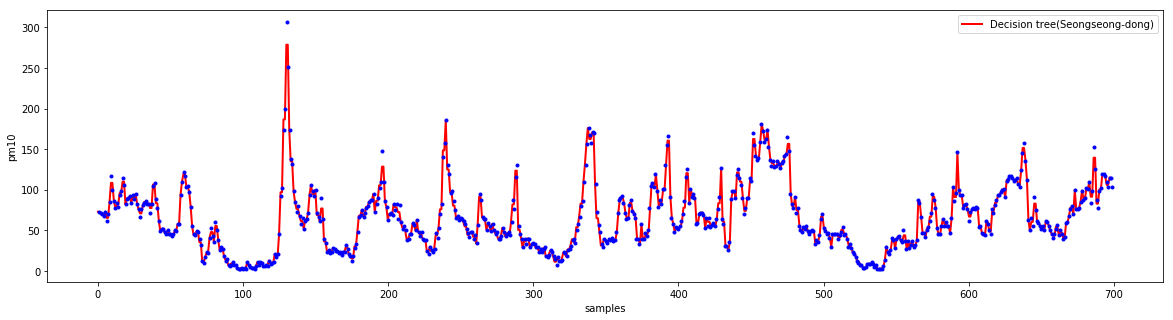

In [4]:

#print(b)

plt.figure(figsize=(20, 5))

line = np.linspace(0, 698, 699, endpoint=False).reshape(-1, 1)
print(line.shape)

reg3 = DecisionTreeRegressor(min_samples_split=3).fit(aT, d)
plt.plot(line, reg3.predict(line), label="Decision tree(Seongseong-dong)", c='r')

plt.plot(aT, d, '.', c='b')
#plt.xticks(rotation=90)
plt.ylabel("pm10")
plt.xlabel("samples")
plt.legend(loc="best")

In [5]:
bins = np.linspace(0, 689, 100)
print("bins: {}".format(bins))

bins: [  0.      6.96   13.919  20.879  27.838  34.798  41.758  48.717  55.677
  62.636  69.596  76.556  83.515  90.475  97.434 104.394 111.354 118.313
 125.273 132.232 139.192 146.152 153.111 160.071 167.03  173.99  180.949
 187.909 194.869 201.828 208.788 215.747 222.707 229.667 236.626 243.586
 250.545 257.505 264.465 271.424 278.384 285.343 292.303 299.263 306.222
 313.182 320.141 327.101 334.061 341.02  347.98  354.939 361.899 368.859
 375.818 382.778 389.737 396.697 403.657 410.616 417.576 424.535 431.495
 438.455 445.414 452.374 459.333 466.293 473.253 480.212 487.172 494.131
 501.091 508.051 515.01  521.97  528.929 535.889 542.848 549.808 556.768
 563.727 570.687 577.646 584.606 591.566 598.525 605.485 612.444 619.404
 626.364 633.323 640.283 647.242 654.202 661.162 668.121 675.081 682.04
 689.   ]


In [6]:
aT = np.array(aT,dtype='float64')
which_bin = np.digitize(aT, bins=bins)
print("\nData points:\n", aT[:600])
print("\nBin membership for data points:\n", which_bin[:600])


Data points:
 [[  1.]
 [  2.]
 [  3.]
 [  4.]
 [  5.]
 [  6.]
 [  7.]
 [  8.]
 [  9.]
 [ 10.]
 [ 11.]
 [ 12.]
 [ 13.]
 [ 14.]
 [ 15.]
 [ 16.]
 [ 17.]
 [ 18.]
 [ 19.]
 [ 20.]
 [ 21.]
 [ 22.]
 [ 23.]
 [ 24.]
 [ 25.]
 [ 26.]
 [ 27.]
 [ 28.]
 [ 29.]
 [ 30.]
 [ 31.]
 [ 32.]
 [ 33.]
 [ 34.]
 [ 35.]
 [ 36.]
 [ 37.]
 [ 38.]
 [ 39.]
 [ 40.]
 [ 41.]
 [ 42.]
 [ 43.]
 [ 44.]
 [ 45.]
 [ 46.]
 [ 47.]
 [ 48.]
 [ 49.]
 [ 50.]
 [ 51.]
 [ 52.]
 [ 53.]
 [ 54.]
 [ 55.]
 [ 56.]
 [ 57.]
 [ 58.]
 [ 59.]
 [ 60.]
 [ 61.]
 [ 62.]
 [ 63.]
 [ 64.]
 [ 65.]
 [ 66.]
 [ 67.]
 [ 68.]
 [ 69.]
 [ 70.]
 [ 71.]
 [ 72.]
 [ 73.]
 [ 74.]
 [ 75.]
 [ 76.]
 [ 77.]
 [ 78.]
 [ 79.]
 [ 80.]
 [ 81.]
 [ 82.]
 [ 83.]
 [ 84.]
 [ 85.]
 [ 86.]
 [ 87.]
 [ 88.]
 [ 89.]
 [ 90.]
 [ 91.]
 [ 92.]
 [ 93.]
 [ 94.]
 [ 95.]
 [ 96.]
 [ 97.]
 [ 98.]
 [ 99.]
 [100.]
 [101.]
 [102.]
 [103.]
 [104.]
 [105.]
 [106.]
 [107.]
 [108.]
 [109.]
 [110.]
 [111.]
 [112.]
 [113.]
 [114.]
 [115.]
 [116.]
 [117.]
 [118.]
 [119.]
 [120.]
 [121.]
 [122.]
 [123.]
 

In [7]:
from sklearn.preprocessing import OneHotEncoder

# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

print(X_binned[:600
              ])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
print("X.shape: {}".format(aT.shape))
print("X_binned.shape: {}".format(X_binned.shape))

X.shape: (699, 1)
X_binned.shape: (699, 100)


line.shape: (699, 1)
line_binned.shape: (699, 100)


Text(0.5,0,'Input feature')

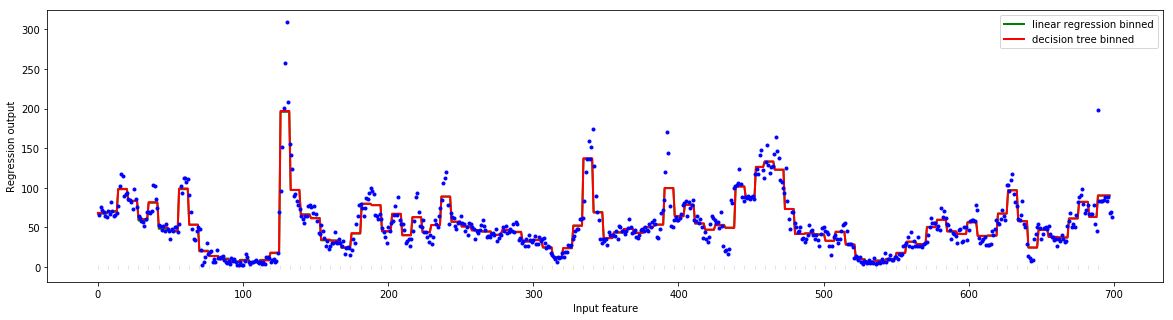

In [9]:
encoder = OneHotEncoder(sparse=False)
which_bin = np.digitize(aT, bins=bins)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)

plt.figure(figsize=(20, 5))
line = np.linspace(0, 698, 699, endpoint=False).reshape(-1, 1)
print("line.shape:", line.shape)
line_binned = encoder.transform(np.digitize(line, bins=bins))
print("line_binned.shape:", line_binned.shape)

reg = LinearRegression().fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='linear regression binned', c='g')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, b)
plt.plot(line, reg.predict(line_binned), label='decision tree binned', c='r')

plt.plot(aT[:, 0], b, '.', c='b')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.1)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

In [10]:
X_combined = np.hstack([aT, X_binned])
print(X_combined.shape)
print(X_combined[:5])

(699, 101)
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [3. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0.]
 [4. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

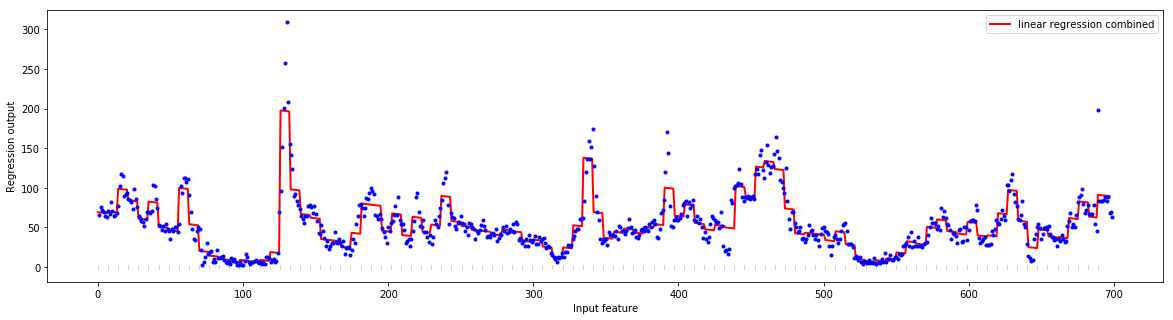

In [11]:
reg = LinearRegression().fit(X_combined, b)

plt.figure(figsize=(20, 5))

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined', c='r')

plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)

plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(aT[:, 0], b, '.', c='b')

In [12]:
X_product = np.hstack([X_binned, aT * X_binned])
print(X_product.shape)
print(X_product[:5])

(699, 200)
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.


[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0. 301.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

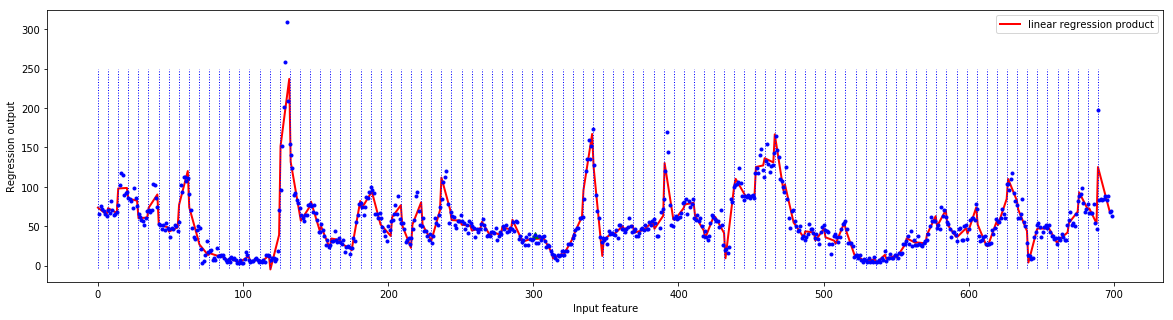

In [13]:
reg = LinearRegression().fit(X_product, b)

plt.figure(figsize=(20, 5))

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product', c='r')

for bin in bins:
    plt.plot([bin, bin], [-3, 250], ':', c='b', linewidth=1)

print(X_product[300], b[300])
plt.plot(aT[300],b[300], '^', c='g')
    
plt.plot(aT[:, 0], b, '.', c='b')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

X.shape: (699, 1)
X_poly.shape: (699, 14)
Entries of X:
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Entries of X_poly:
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
  1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03 8.192e+03]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02 7.290e+02
  2.187e+03 6.561e+03 1.968e+04 5.905e+04 1.771e+05 5.314e+05 1.594e+06]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03 4.096e+03
  1.638e+04 6.554e+04 2.621e+05 1.049e+06 4.194e+06 1.678e+07 6.711e+07]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 1.562e+04
  7.812e+04 3.906e+05 1.953e+06 9.766e+06 4.883e+07 2.441e+08 1.221e+09]]
Polynomial feature names:
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13']


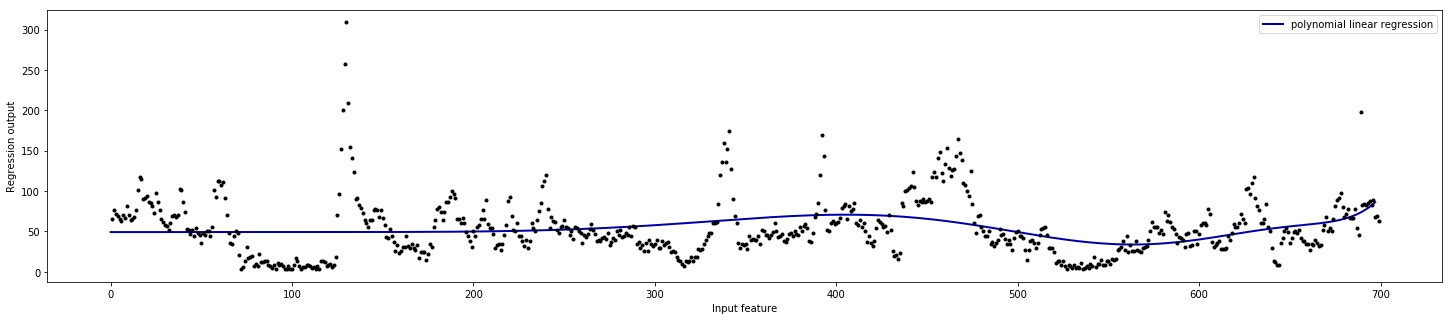

In [14]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=13, include_bias=True)
poly.fit(aT)
X_poly = poly.transform(aT)

print("X.shape: {}".format(aT.shape))
print("X_poly.shape: {}".format(X_poly.shape))

print("Entries of X:\n{}".format(aT[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, b)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [15]:
print("X.shape: {}".format(aT.shape))
print("X_poly.shape: {}".format(X_poly.shape))

X.shape: (699, 1)
X_poly.shape: (699, 14)


In [16]:
print("Entries of X:\n{}".format(aT[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[1.]
 [2.]
 [3.]
 [4.]
 [5.]]
Entries of X_poly:
[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01 6.400e+01
  1.280e+02 2.560e+02 5.120e+02 1.024e+03 2.048e+03 4.096e+03 8.192e+03]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02 7.290e+02
  2.187e+03 6.561e+03 1.968e+04 5.905e+04 1.771e+05 5.314e+05 1.594e+06]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03 4.096e+03
  1.638e+04 6.554e+04 2.621e+05 1.049e+06 4.194e+06 1.678e+07 6.711e+07]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03 1.562e+04
  7.812e+04 3.906e+05 1.953e+06 9.766e+06 4.883e+07 2.441e+08 1.221e+09]]


In [17]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10', 'x0^11', 'x0^12', 'x0^13']


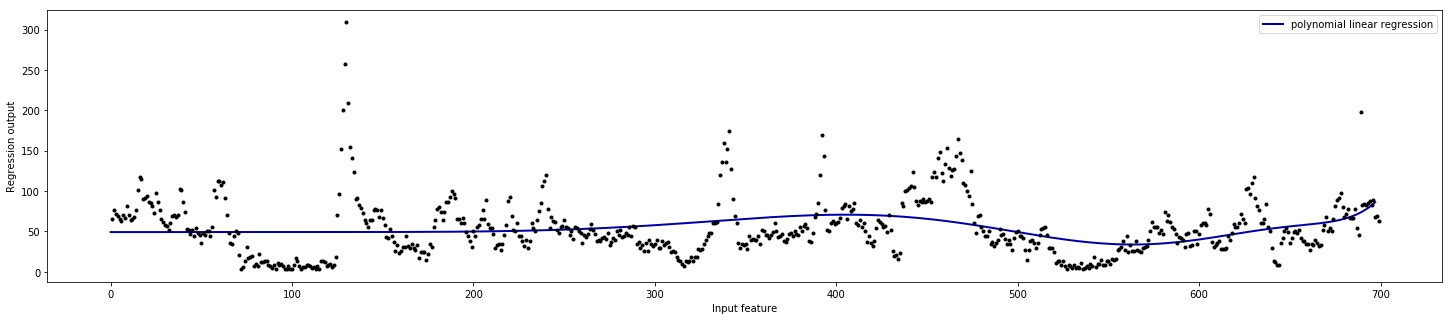

In [18]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, b)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

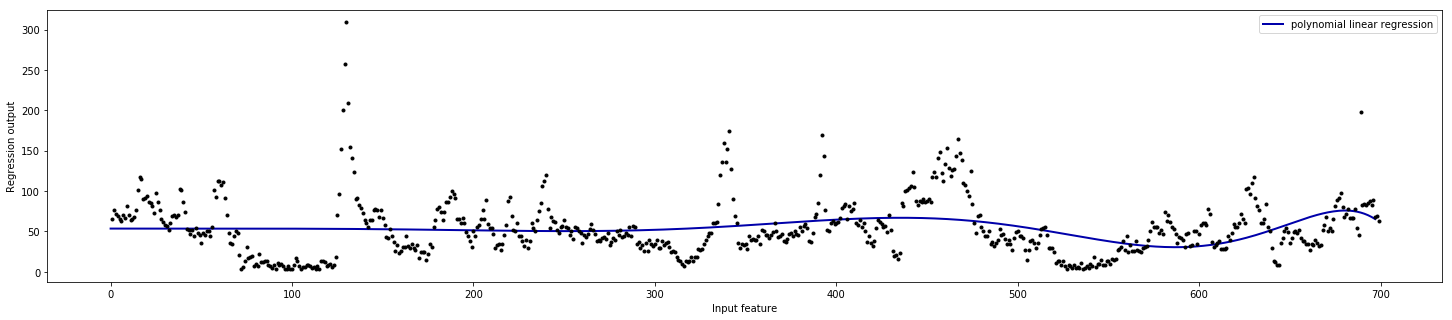

In [19]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x ** 10:
# the default "include_bias=True" adds a feature that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=True)
poly.fit(aT)
X_poly = poly.transform(aT)

from sklearn.linear_model import LinearRegression

plt.figure(figsize=(25, 5))

reg = LinearRegression().fit(X_poly, b)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

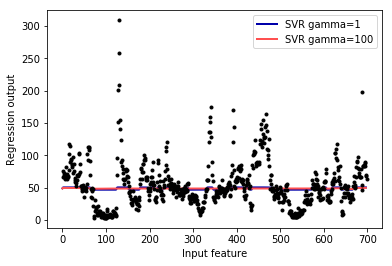

In [20]:
from sklearn.svm import SVR

for gamma in [1, 100]:
    svr = SVR(gamma=gamma).fit(aT, b)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(aT[:, 0], b, '.', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")